<a href="https://colab.research.google.com/github/fariaslrc/science/blob/main/exerc%C3%ADcio_Pandas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 03

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os Tutores
- Divirta-se :)

In [ ]:
import pandas as pd
import requests

####  1) Lendo de APIs
Vimos em aula como carregar dados públicos do governo através de um API (*Application Programming Interface*). No exemplo de aula, baixamos os dados de pedidos de verificação de limites (PVL) realizados por estados, e selecionamos apenas aqueles referentes ao estado de São Paulo.

1. Repita os mesmos passos feitos em aula, mas selecione os PVLs realizados por municípios no estado do Rio de Janeiro.
2. Quais são os três *status* das solicitações mais frequentes na base? Quais são suas frequências?
3. Construa uma nova variável que contenha o ano do **status**. Observe que ```data_status``` vem como tipo *object* no **DataFrame**. Dica: você pode usar o método ```.str``` para transformar o tipo da variável em string, em seguida um método como [**slice()**](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html) ou [**split()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html).
4. Indique a frequência de cada ano do campo construído no item (3).

In [ ]:
# 1) PVLs realizados por municípios no estado do Rio de Janeiro
import pandas as pd
import requests

url = 'https://apidatalake.tesouro.gov.br/ords/sadipem/tt/pvl?uf=RJ&tipo_interessado=Munic%C3%ADpio'

r = requests.get(url)

data_json = r.json()

df = pd.DataFrame(data_json['items'])

df

,id_pleito,tipo_interessado,interessado,cod_ibge,uf,num_pvl,status,num_processo,data_protocolo,tipo_operacao,finalidade,tipo_credor,credor,moeda,valor,pvl_assoc_divida,pvl_contradado_credor,data_status
0,4924,Município,Rio de Janeiro,3304557,RJ,None,Arquivado,10951.000224/2000-63,2005-12-27T02:00:00Z,Operação contratual externa (com garantia da U...,Preservação e recuperação ambiental,Instituição Financeira Internacional,Japan Bank for International Cooperation,Iene,18362000.00,0,0,17/08/2006
1,5864,Município,Duas Barras,3301603,RJ,None,Arquivado,17944.000218/2008-72,2008-04-14T03:00:00Z,Operação contratual interna,Caminho da Escola,Instituição Financeira Nacional,Banco do Brasil S/A,Real,179900.00,0,0,06/05/2008
2,5328,Município,São João de Meriti,3305109,RJ,None,Arquivado,17944.000088/2007-97,2007-01-17T02:00:00Z,Operação contratual interna,Provias,Instituição Financeira Nacional,Banco do Brasil S/A,Real,1980000.00,0,0,28/05/2007
3,5843,Município,Maricá,3302700,RJ,None,Arquivado,17944.000212/2010-10,2010-11-30T02:00:00Z,Operação contratual interna,PAC - Pró-Moradia - 2009,Instituição Financeira Nacional,Caixa Econômica Federal,Real,51016091.98,0,0,28/12/2010
4,43898,Município,Pinheiral,3303955,RJ,PVL02.000209/2021-96,Deferido (PVL-IF),None,None,Operação contratual interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Banco do Brasil S/A,Real,2621825.00,0,1,26/07/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,60129,Município,Petrópolis,3303906,RJ,PVL02.005941/2022-33,Deferido,17944.102383/2022-16,2022-06-21T13:15:44Z,Operação contratual interna,Infraestrutura,Instituição Financeira Nacional,Caixa Econômica Federal,Real,80000000.00,0,1,22/06/2022
239,6266,Município,Maricá,3302700,RJ,None,Regularizado,17944.000308/2010-88,2011-12-19T02:00:00Z,Operação contratual interna,Regularização de Dívida - Energia Elétrica,Empresa Não Estatal,Ampla Energia e Serviços S/A,Real,862347.63,0,0,20/01/2012
240,32212,Município,Miguel Pereira,3302908,RJ,PVL02.001363/2019-61,Deferido (PVL-IF),None,None,Operação contratual interna,"Aquisição de máquinas, equipamentos e veículos",Instituição Financeira Nacional,Agência de Fomento do Estado do Rio de Janeiro,Real,4500000.00,0,1,22/07/2019
241,63831,Município,Mesquita,3302858,RJ,PVL02.000044/2023-14,Deferido,17944.101173/2023-91,2023-03-30T14:02:21Z,Operação contratual interna,Infraestrutura,Instituição Financeira Nacional,Caixa Econômica Federal,Real,30000000.00,0,0,31/03/2023


In [ ]:
# 2) Três status das solicitações mais frequentes na base? Quais são suas frequências?
df['status'].value_counts().head(3)

Deferido        96
Arquivado       53
Regularizado    26
Name: status, dtype: int64

In [ ]:
# 3) Construa uma nova variável que contenha o ano do status. Observe que data_status vem como
# tipo object no DataFrame. Dica: você pode usar o método .str para transformar o tipo da variável em string,
# em seguida um método como slice() ou split()

df['ano_status'] = df['data_status'].str.slice(6)
df['ano_status']

0      2006
1      2008
2      2007
3      2010
4      2021
       ... 
238    2022
239    2012
240    2019
241    2023
242    2010
Name: ano_status, Length: 243, dtype: object

<AxesSubplot:>

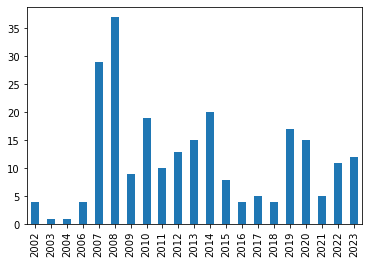

In [ ]:
# 4) Indique a frequência de cada ano do campo construído no item (3)
df['ano_status'].value_counts().sort_index().plot(kind='bar')

####  2) Melhorando a interação com o API
Observe dois URLs de consultas diferentes, por exemplo o URL utilizado em aula, e o URL feito no exercício anterior. Compare-os e observe as diferenças.

1. Faça uma função em Python que recebe como argumento o UF da consulta e o tipo de interessado (```'Estado'```ou ```Município```), e que devolve os dados da consulta no formato *DataFrame*.
2. Quantas solicitações para o Estado podem ser consultadas para Minas Gerais com *status* em 'Arquivado por decurso de prazo' estão registradas?
3. Qual é o município da Bahia com mais solicitações deferidas?
4. Salve um arquivo .csv com os dados de solicitações da Bahia, com interessado = 'Estado'

In [ ]:
#1) Faça uma função em Python que recebe como argumento o UF da consulta e o tipo de interessado ('Estado'ou Município),
# e que devolve os dados da consulta no formato DataFrame.
import requests
import pandas as pd

def give_me_dataFrames(uf: str, tipo: str):
    # garantir que o UF passado esteja em caixa alta
    uf = uf.upper()

    # verificar se a busca é por estado ou município
    tipo_interessado = 'Estado' if tipo == 'Estado' else 'Munic%C3%ADpio'

    # construir url usando uf e tipo
    url = f'https://apidatalake.tesouro.gov.br/ords/sadipem/tt/pvl?uf={uf}&tipo_interessado={tipo_interessado}'

    # requisitar url
    r = requests.get(url)

    # pegar json da url
    data_json = r.json()

    # converter json em dataframe
    df = pd.DataFrame(data_json['items'])

    # retornar dataframe
    return df

In [ ]:
# 2) Quantas solicitações para o Estado podem ser consultadas para Minas Gerais com status em
# 'Arquivado por decurso de prazo' estão registradas?

df = give_me_dataFrames('MG', 'Estado')
solicitacoes_minas = df[df['status'] == 'Arquivado por decurso de prazo']
quantidade_solicitacoes_minas = len(solicitacoes_minas)
quantidade_solicitacoes_minas

1

In [ ]:
# 3) Qual é o município da Bahia com mais solicitações deferidas?
df = give_me_dataFrames('BA', 'Município')
solicitacoes_deferidas_bahia = df[df['status'] == 'Deferido']
municipio_mais_solicitacoes_deferidas = solicitacoes_deferidas_bahia['interessado'].value_counts().head(1)
municipio_mais_solicitacoes_deferidas

Luís Eduardo Magalhães    15
Name: interessado, dtype: int64

In [ ]:
# 4) Salve um arquivo .csv com os dados de solicitações da Bahia, com interessado = 'Estado'
df = give_me_dataFrames('BA', 'Estado')
df.to_csv('solicitacoes_bahia.csv', index= False, sep=';')
